In [1]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay,
)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_women: pd.DataFrame = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "babyoda/women-entrepreneurship-and-labor-force",
    "Dataset3.csv",
    pandas_kwargs={
        "sep": ";",
    }
)

In [3]:
df_students: pd.DataFrame = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "namanmanchanda/entrepreneurial-competency-in-university-students",
    "data.csv",
)

In [4]:
df_women.head(5)

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [5]:
df_students.head(5)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [6]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [7]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

## Предобработка

### Women Entrepreneurship Index

In [8]:
df_women_processed = df_women.copy()

In [9]:
df_women_processed.drop(columns=['No', 'Currency', 'European Union Membership', ], inplace=True)

In [10]:
df_women_processed.isnull().sum()

Country                                  0
Level of development                     0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

In [11]:
df_women_processed['Level_of_development_enc'] = LabelEncoder().fit_transform(df_women_processed['Level of development'])
df_women_processed.drop(columns=['Level of development'], inplace=True)

In [12]:
countries = df_women_processed['Country'].tolist()
df_women_processed.drop(columns=['Country'], inplace=True)

In [13]:
standard_scaler = StandardScaler()
numeric_cols = [
    'Women Entrepreneurship Index',
    'Entrepreneurship Index',
    'Inflation rate',
    'Female Labor Force Participation Rate'
]
df_women_processed[numeric_cols] = standard_scaler.fit_transform(df_women_processed[numeric_cols])

In [14]:
df_women_processed.head(5)

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Level_of_development_enc
0,0.500053,1.101363,-0.316773,0.627787,0
1,1.115856,1.138785,-0.373083,-0.035094,0
2,0.535444,0.808229,-0.650880,0.729768,0
3,1.314046,1.151258,-0.523244,0.671493,0
4,1.483922,1.251049,-0.485704,0.154301,0


### Students Entrepreneurial Competency

In [15]:
df_students_processed = df_students.copy()

In [16]:
df_students_processed.drop(columns=['City', 'KeyTraits', 'ReasonsForLack', 'IndividualProject'], inplace=True)

In [17]:
df_students_processed.isnull().sum()

EducationSector           0
Age                       0
Gender                    0
Influenced                0
Perseverance              0
DesireToTakeInitiative    0
Competitiveness           0
SelfReliance              0
StrongNeedToAchieve       0
SelfConfidence            0
GoodPhysicalHealth        0
MentalDisorder            0
y                         0
dtype: int64

In [18]:
category_cols = ['EducationSector', 'Gender', 'Influenced', 'MentalDisorder']
for col in category_cols:
    df_students_processed[col] = LabelEncoder().fit_transform(df_students_processed[col])

In [19]:
X, y = df_students_processed.drop(columns=['y']), df_students_processed['y']

In [20]:
numeric_cols = [
    'Age', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
    'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth'
]
X[numeric_cols] = StandardScaler().fit_transform(X[numeric_cols])

In [21]:
X.head(5)

,EducationSector,Age,Gender,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder
0,2,-0.585460,1,0,-1.361182,-1.409774,-0.531472,-0.686308,-1.869914,-1.409655,-0.511621,1
1,2,1.745735,1,1,-0.354091,-0.540082,-0.531472,0.264967,0.089470,-0.514831,0.399314,1
2,2,-1.362525,1,0,-0.354091,0.329609,-0.531472,-0.686308,-0.890222,0.379994,0.399314,0
3,2,0.191605,1,1,-0.354091,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-0.511621,0
4,2,-0.585460,1,1,-1.361182,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-1.422557,1


## EDA

In [22]:
cols = [
    "Entrepreneurship Index",
    "Women Entrepreneurship Index",
    "Inflation rate",
    "Female Labor Force Participation Rate"
]

In [23]:
df_women[cols].describe().round(2)

,Entrepreneurship Index,Women Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.00,51.00,51.00,51.00
mean,47.24,47.84,2.59,58.48
std,16.19,14.27,5.38,13.86
min,24.80,25.30,-2.25,13.00
25%,31.90,36.35,-0.50,55.80
50%,42.70,44.50,0.60,61.00
75%,65.40,59.15,3.60,67.40
max,77.60,74.80,26.50,82.30


In [24]:
df_women[cols].corr().round(2)

,Entrepreneurship Index,Women Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Entrepreneurship Index,1.00,0.91,-0.40,0.33
Women Entrepreneurship Index,0.91,1.00,-0.46,0.44
Inflation rate,-0.40,-0.46,1.00,-0.14
Female Labor Force Participation Rate,0.33,0.44,-0.14,1.00


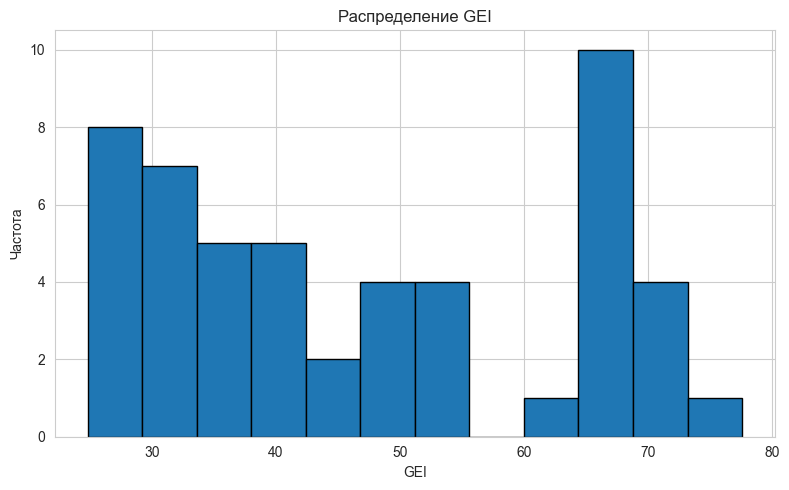

In [25]:
plt.figure(figsize=(8, 5))
df_women["Entrepreneurship Index"].hist(bins=12, edgecolor="k")
plt.title("Распределение GEI")
plt.xlabel("GEI")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

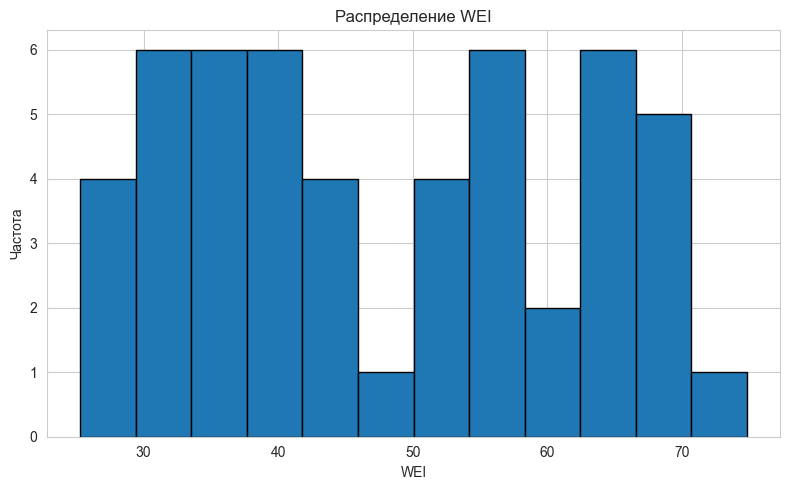

In [26]:
plt.figure(figsize=(8, 5))
df_women["Women Entrepreneurship Index"].hist(bins=12, edgecolor="k")
plt.title("Распределение WEI")
plt.xlabel("WEI")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

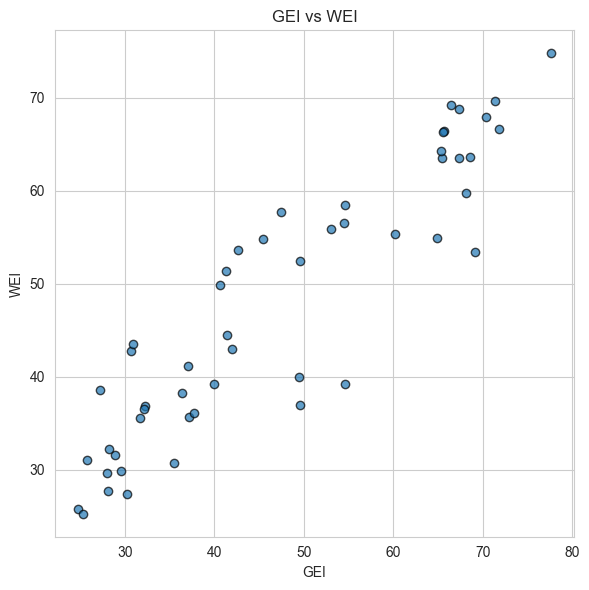

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(
    df_women["Entrepreneurship Index"],
    df_women["Women Entrepreneurship Index"],
    alpha=0.7, edgecolor="k"
)
plt.title("GEI vs WEI")
plt.xlabel("GEI")
plt.ylabel("WEI")
plt.grid(True)
plt.tight_layout()
plt.show()

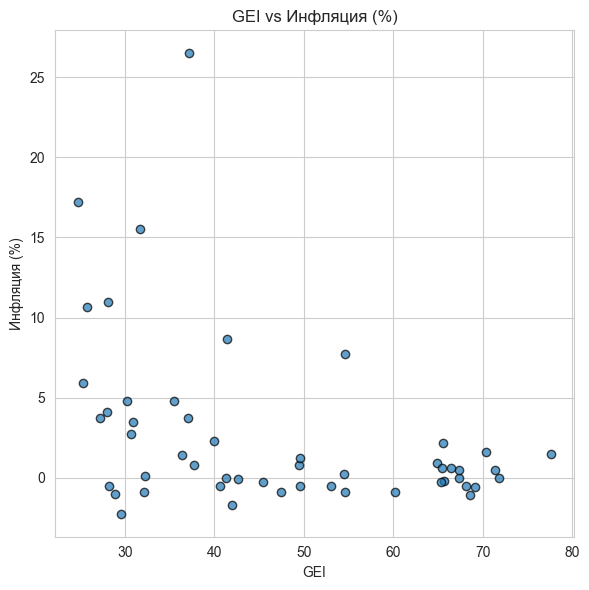

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(
    df_women["Entrepreneurship Index"],
    df_women["Inflation rate"],
    alpha=0.7, edgecolor="k"
)
plt.title("GEI vs Инфляция (%)")
plt.xlabel("GEI")
plt.ylabel("Инфляция (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

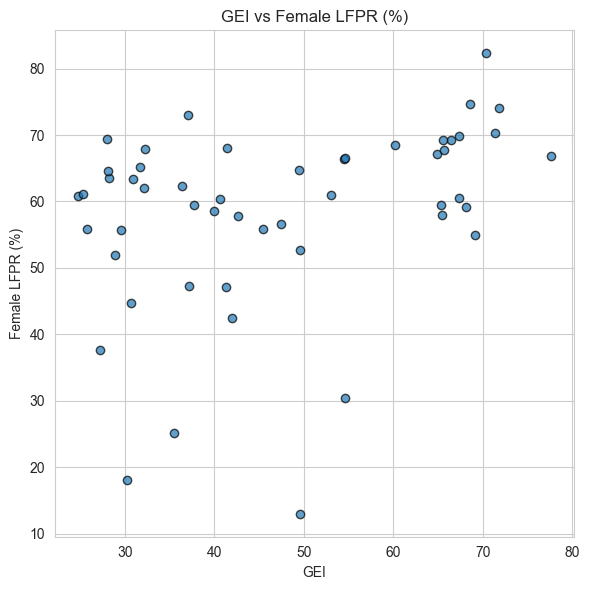

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(
    df_women["Entrepreneurship Index"],
    df_women["Female Labor Force Participation Rate"],
    alpha=0.7, edgecolor="k"
)
plt.title("GEI vs Female LFPR (%)")
plt.xlabel("GEI")
plt.ylabel("Female LFPR (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Факторный анализ

In [30]:
numeric_cols = [
    'Entrepreneurship Index',
    'Women Entrepreneurship Index',
    'Inflation rate',
    'Female Labor Force Participation Rate'
]

In [31]:
factory_data = StandardScaler().fit_transform(df_women[numeric_cols].dropna())

In [ ]:
factory_analyzer = FactorAnalyzer(rotation=None)
factory_analyzer.fit(factory_data)

In [33]:
original_values, common_values = factory_analyzer.get_eigenvalues()

In [34]:
print("Собственные значения:", original_values)

Собственные значения: [2.42944974 0.86248824 0.63316061 0.0749014 ]


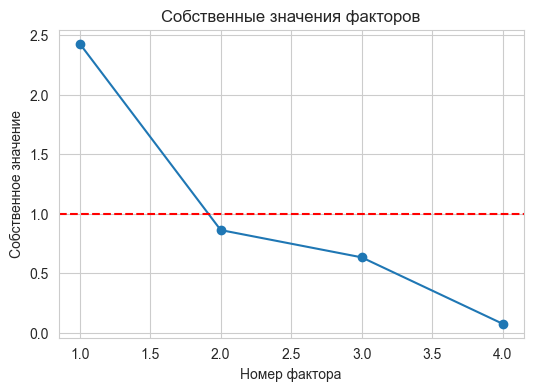

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(original_values) + 1), original_values, 'o-')
plt.axhline(1, color='red', linestyle='--')
plt.title('Собственные значения факторов')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.grid(True)
plt.show()

In [36]:
n_factors = sum(original_values > 1)
print(f"Число факторов (eigenvalue > 1): {n_factors}")

Число факторов (eigenvalue > 1): 1


In [ ]:
factory_analyzer = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
factory_analyzer.fit(factory_data)

In [38]:
loadings = pd.DataFrame(
    factory_analyzer.loadings_,
    index=numeric_cols,
    columns=[f'Фактор{i + 1}' for i in range(n_factors)]
)
loadings

,Фактор1
Entrepreneurship Index,-0.896029
Women Entrepreneurship Index,-1.011144
Inflation rate,0.438626
Female Labor Force Participation Rate,-0.399985


In [ ]:
factory_scores = factory_analyzer.transform(factory_data)
df_factors = pd.DataFrame(
    factory_scores,
    columns=[f'Фактор{i + 1}' for i in range(n_factors)]
)
df_factors['Country'] = df_women['Country'].values

In [40]:
df_factors.head(5)

,Фактор1,Country
0,-0.331797,Austria
1,-1.149984,Belgium
2,-0.417979,Estonia
3,-1.335281,Finland
4,-1.570324,France


# Кластерный анализ

In [41]:
X_clust = df_women_processed.copy()

In [42]:
inertia = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_clust)
    inertia.append(km.inertia_)

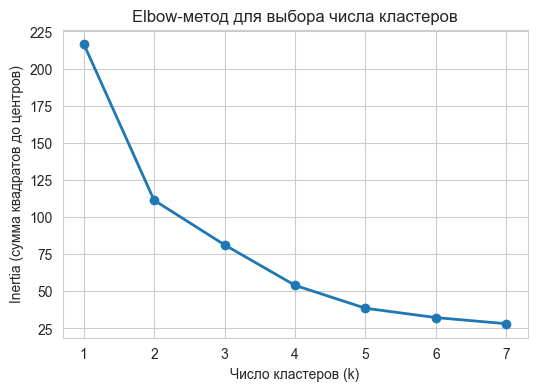

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-', linewidth=2)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (сумма квадратов до центров)')
plt.title('Elbow-метод для выбора числа кластеров')
plt.grid(True)
plt.show()

In [44]:
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=11, n_init=10)
clusters = kmeans.fit_predict(X_clust)

In [45]:
df_women['Cluster'] = clusters

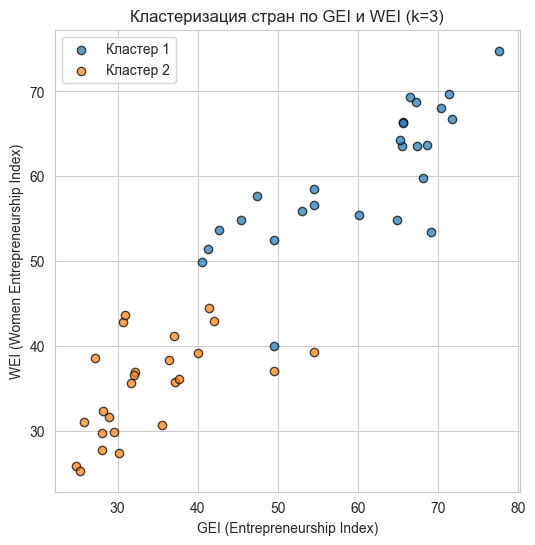

In [46]:
plt.figure(figsize=(6, 6))
for cl in range(k_opt):
    mask = df_women['Cluster'] == cl
    plt.scatter(
        df_women.loc[mask, 'Entrepreneurship Index'],
        df_women.loc[mask, 'Women Entrepreneurship Index'],
        label=f'Кластер {cl + 1}',
        alpha=0.7, edgecolor='k'
    )
plt.xlabel('GEI (Entrepreneurship Index)')
plt.ylabel('WEI (Women Entrepreneurship Index)')
plt.title('Кластеризация стран по GEI и WEI (k=3)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
cluster_profiles = df_women.groupby('Cluster')[
    [
        'Entrepreneurship Index',
        'Women Entrepreneurship Index',
        'Inflation rate',
        'Female Labor Force Participation Rate'
    ]
].mean().round(2)
cluster_profiles

,Entrepreneurship Index,Women Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Cluster,,,,
0,60.16,59.99,0.08,63.89
1,33.81,35.20,5.20,52.86


In [48]:
cluster_profiles['Cluster_description'] = [
    "Advanced/Inclusive (высокие GEI, WEI, низкая инфляция)",
    "Developing/Challenges (низкие GEI, WEI, высокая инфляция)"
]
cluster_profiles

,Entrepreneurship Index,Women Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Cluster_description
Cluster,,,,,
0,60.16,59.99,0.08,63.89,"Advanced/Inclusive (высокие GEI, WEI, низкая и..."
1,33.81,35.20,5.20,52.86,"Developing/Challenges (низкие GEI, WEI, высока..."


# Классификационные модели

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=11,
    stratify=y
)

In [50]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=11),
    "DecisionTree": DecisionTreeClassifier(random_state=11),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=11)
}

In [51]:
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append(
        {
            "Model": name,
            "CV Accuracy Mean": cv_scores.mean().round(3),
            "CV Accuracy Std": cv_scores.std().round(3),
            "Test Accuracy": round(acc, 3),
            "Precision": round(prec, 3),
            "Recall": round(rec, 3),
            "F1-score": round(f1, 3),
            "ROC AUC": round(auc, 3)
        }
    )

In [52]:
df_results = pd.DataFrame(results)
df_results

,Model,CV Accuracy Mean,CV Accuracy Std,Test Accuracy,Precision,Recall,F1-score,ROC AUC
0,LogisticRegression,0.554,0.059,0.477,0.381,0.444,0.410,0.515
1,DecisionTree,0.549,0.075,0.545,0.462,0.667,0.545,0.564
2,RandomForest,0.594,0.066,0.545,0.450,0.500,0.474,0.509


In [53]:
best_model = models["RandomForest"]
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [54]:
confusion_matrix(y_test, y_pred)

array([[15, 11],
       [ 9,  9]])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        26
           1       0.45      0.50      0.47        18

    accuracy                           0.55        44
   macro avg       0.54      0.54      0.54        44
weighted avg       0.55      0.55      0.55        44



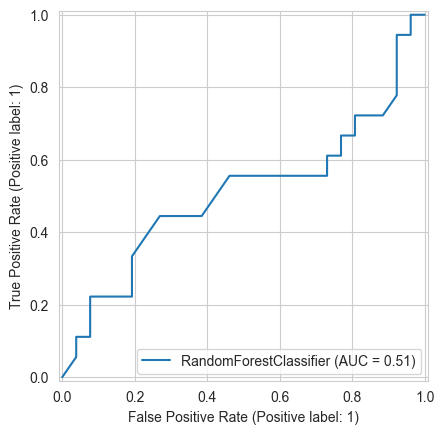

In [56]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

In [57]:
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

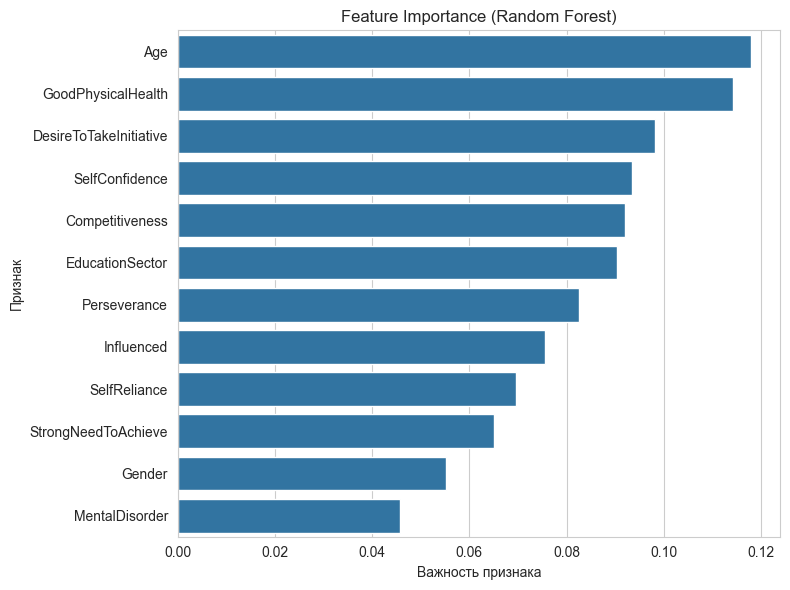

In [58]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()

## Регрессионные и сценарные модели

In [59]:
reg_df = df_women[[
    'Entrepreneurship Index',
    'Women Entrepreneurship Index',
    'Inflation rate',
    'Female Labor Force Participation Rate'
]].dropna()

In [60]:
y = reg_df['Entrepreneurship Index']
X = reg_df.drop(columns=['Entrepreneurship Index'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Entrepreneurship Index   R-squared:                       0.852
Model:                                OLS   Adj. R-squared:                  0.840
Method:                     Least Squares   F-statistic:                     69.31
Date:                    Wed, 07 May 2025   Prob (F-statistic):           5.00e-15
Time:                            17:25:36   Log-Likelihood:                -130.82
No. Observations:                      40   AIC:                             269.6
Df Residuals:                          36   BIC:                             276.4
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3207      5.513     -0.421      0.676     -13.502       8.861
Women Entrepreneurship Index              1.0724      0.092     11.644      0.000       0.886       1.259
Inflation rate                            0.0969      0.210      0.461      0.648      -0.329       0.523
Female Labor Force Participation Rate    -0.0285      0.091     -0.312      0.757      -0.214       0.157
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   2.753
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.556
Skew:                           0.209   Prob(JB):                        0.757
Kurtosis:                       3.399   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_test_sm = sm.add_constant(X_test)
y_pred_lin = ols_model.predict(X_test_sm)

In [64]:
print(f"R² Linear (test): {r2_score(y_test, y_pred_lin):.3f}")
print(f"RMSE Linear (test): {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.2f}\n")

R² Linear (test): 0.757
RMSE Linear (test): 6.61



In [65]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [66]:
print(f"R² RF (test): {r2_score(y_test, y_pred_rf):.3f}")
print(f"RMSE RF (test): {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}\n")

R² RF (test): 0.515
RMSE RF (test): 9.32



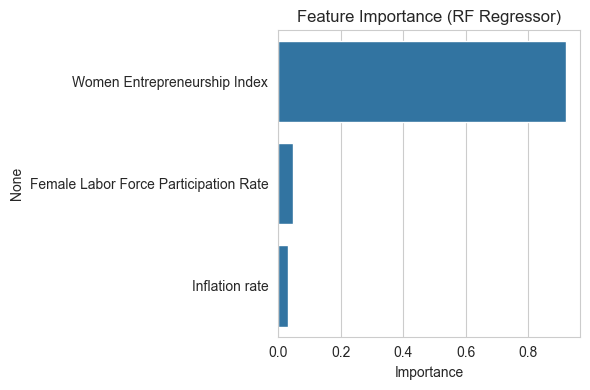

In [67]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (RF Regressor)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [68]:
scenario = pd.DataFrame(
    {
        'Women Entrepreneurship Index': [20, 40, 60, 80],
        'Inflation rate': [0, 2, 5, 10],
        'Female Labor Force Participation Rate': X['Female Labor Force Participation Rate'].mean()
    }
)

In [69]:
scenario_sm = sm.add_constant(scenario, has_constant='add')
scenario['GEI_pred_linear'] = ols_model.predict(scenario_sm)

In [70]:
scenario_rf = scenario[X.columns]
scenario['GEI_pred_rf'] = rf.predict(scenario_rf)

In [71]:
scenario

,Women Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,GEI_pred_linear,GEI_pred_rf
0,20,0,58.481765,17.462295,28.2235
1,40,2,58.481765,39.104134,40.7615
2,60,5,58.481765,60.842854,56.3055
3,80,10,58.481765,82.775334,72.3385
